# Sarah Theriot
# Term Project: Milestone 1
# DSC 550

# Project Narrative:
## Apple is one of the most recognized tech companies in the world, offering a wide range of products like iPhones, iPads, Macs, wearables, and services. While hardware sales are a major part of their business, services revenue — like subscriptions, apps, and cloud offerings — is becoming increasingly important and varies across regions and states.

## This project focuses on understanding how Apple’s services revenue differs by location and how it relates to the sales of their main product categories. By analyzing historical sales and services data across U.S. states and regions, the goal is to predict services revenue based on product sales and geographic factors.

## These insights can help Apple identify where services are performing best and where there might be opportunities to grow. For instance, if certain states with strong iPhone or Mac sales also show higher services revenue, Apple could tailor marketing efforts to boost subscriptions or app sales in those areas.

## Ultimately, this analysis highlights how combining product sales and location data can support smarter business strategies for expanding Apple’s services ecosystem, which is a key growth area alongside their hardware products.

# Step 1: Load the Dataset

In [3]:
import pandas as pd

file_path = "C:/Users/sarah/OneDrive/Desktop/MSDS/Data Mining/Term Project/apple_sales_2024.csv"
apple_sales = pd.read_csv(file_path)

# Preview the data
apple_sales.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


# Step 2: Summary Statistics & Key Metrics

In [5]:
# Summary statistics for numeric columns
apple_sales.describe()

# Total sales/revenue by product
total_metrics = {
    'Total iPhone Sales (M)': apple_sales['iPhone Sales (in million units)'].sum(),
    'Total iPad Sales (M)': apple_sales['iPad Sales (in million units)'].sum(),
    'Total Mac Sales (M)': apple_sales['Mac Sales (in million units)'].sum(),
    'Total Wearables Sales (M)': apple_sales['Wearables (in million units)'].sum(),
    'Total Services Revenue (B)': apple_sales['Services Revenue (in billion $)'].sum()
}

# Display as DataFrame for clean format
pd.DataFrame.from_dict(total_metrics, orient='index', columns=['Value'])

,Value
Total iPhone Sales (M),17444.50
Total iPad Sales (M),8565.88
Total Mac Sales (M),5555.76
Total Wearables Sales (M),6935.50
Total Services Revenue (B),12447.13


# Step 3: Bar Plot - Total Sales by Product

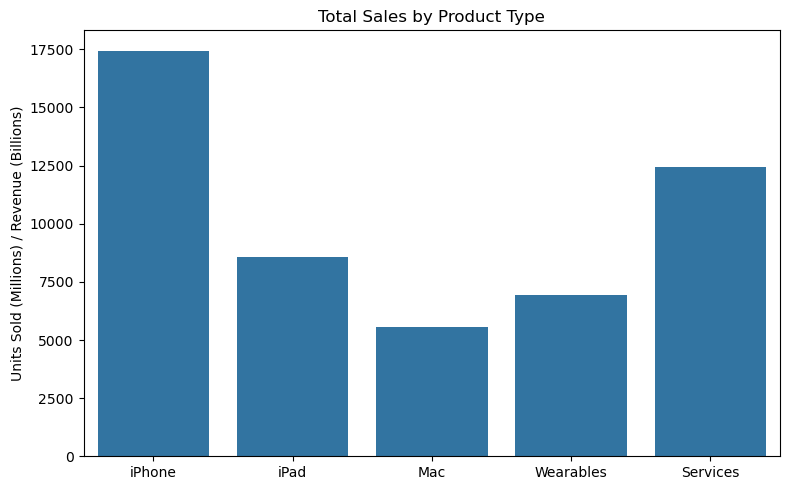

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for total sales by product
product_sales = {
    'Product': ['iPhone', 'iPad', 'Mac', 'Wearables', 'Services'],
    'Total': [
        apple_sales['iPhone Sales (in million units)'].sum(),
        apple_sales['iPad Sales (in million units)'].sum(),
        apple_sales['Mac Sales (in million units)'].sum(),
        apple_sales['Wearables (in million units)'].sum(),
        apple_sales['Services Revenue (in billion $)'].sum()
    ]
}

product_df = pd.DataFrame(product_sales)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=product_df, x='Product', y='Total')
plt.title("Total Sales by Product Type")
plt.ylabel("Units Sold (Millions) / Revenue (Billions)")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Step 4: Line Plot - Average Product Sales by Region

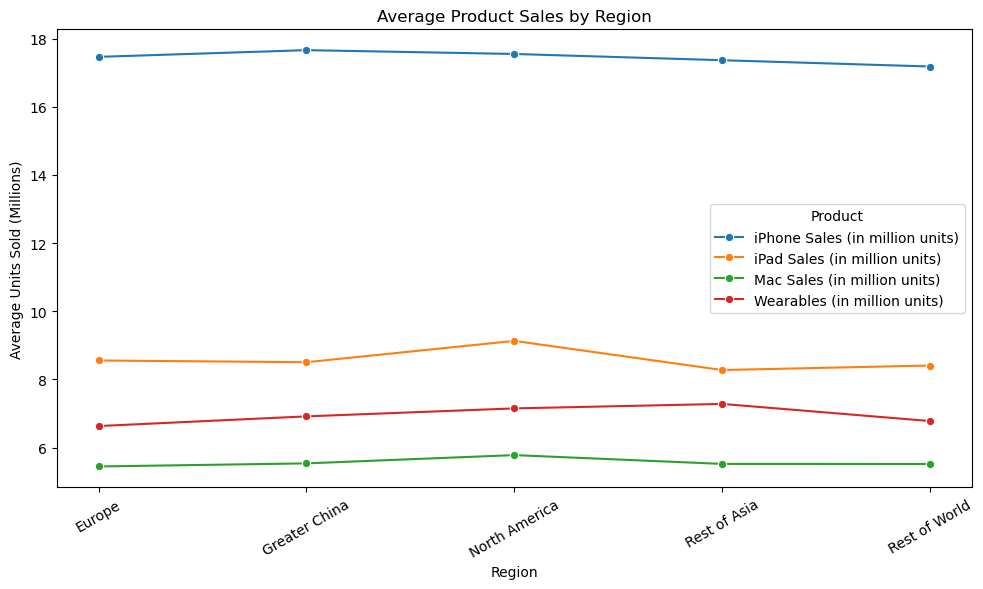

In [15]:
# Group by Region and calculate the average sales for each product
region_avg = apple_sales.groupby('Region')[[
    'iPhone Sales (in million units)',
    'iPad Sales (in million units)',
    'Mac Sales (in million units)',
    'Wearables (in million units)'
]].mean().reset_index()

# Reshape data for plotting multiple lines
region_melted = region_avg.melt(
    id_vars='Region',
    value_vars=[
        'iPhone Sales (in million units)',
        'iPad Sales (in million units)',
        'Mac Sales (in million units)',
        'Wearables (in million units)'
    ],
    var_name='Product',
    value_name='Average Sales'
)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_melted, x='Region', y='Average Sales', hue='Product', marker='o')
plt.title('Average Product Sales by Region')
plt.ylabel('Average Units Sold (Millions)')
plt.xlabel('Region')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Step 5: Pie Chart - Share of Total Apple Sales by Product

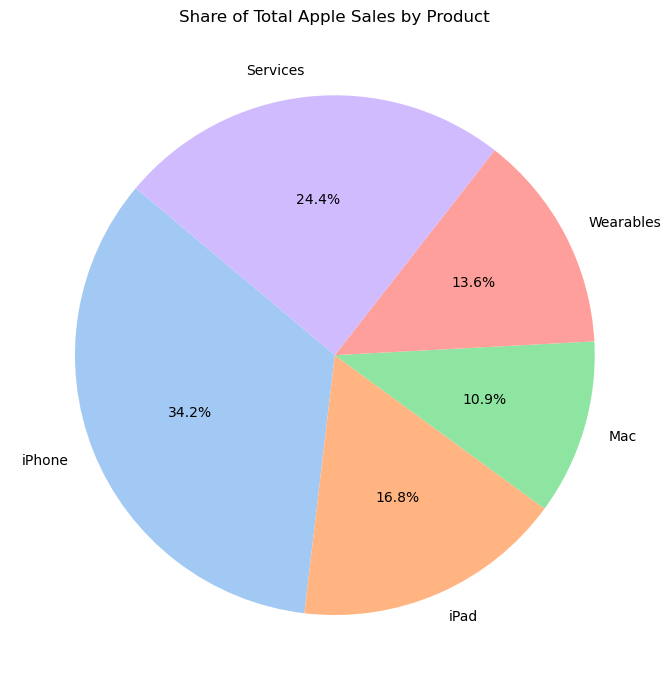

In [19]:
# Total sales
total_sales = {
    'iPhone': apple_sales['iPhone Sales (in million units)'].sum(),
    'iPad': apple_sales['iPad Sales (in million units)'].sum(),
    'Mac': apple_sales['Mac Sales (in million units)'].sum(),
    'Wearables': apple_sales['Wearables (in million units)'].sum(),
    'Services': apple_sales['Services Revenue (in billion $)'].sum()  # Revenue in billions
}

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(total_sales.values(), labels=total_sales.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Share of Total Apple Sales by Product')
plt.tight_layout()
plt.show()

# Step 6: Bar Plot - Top 10 States by Services Revenue

C:\Users\sarah\AppData\Local\Temp\ipykernel_32300\2598730900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_services, x='Services Revenue (in billion $)', y='State', palette="crest", dodge=False)


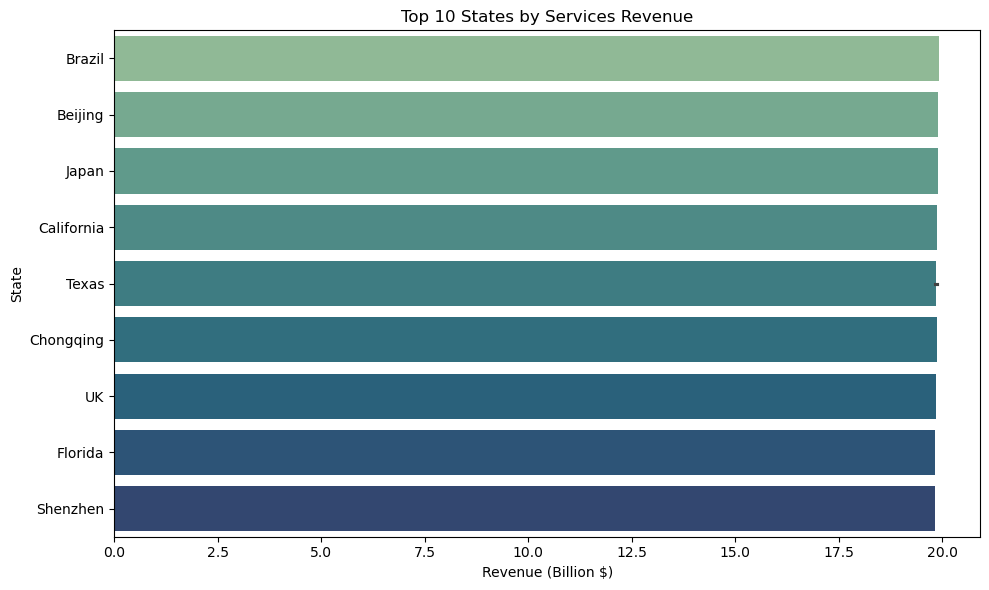

In [23]:
# Define top_services by sorting apple_sales on Services Revenue
top_services = apple_sales.sort_values(by='Services Revenue (in billion $)', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_services, x='Services Revenue (in billion $)', y='State', palette="crest", dodge=False)
plt.title('Top 10 States by Services Revenue')
plt.xlabel('Revenue (Billion $)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Step 7: Box Plot – Variation in iPhone Sales by Region

C:\Users\sarah\AppData\Local\Temp\ipykernel_32300\1609224257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=apple_sales, x="Region", y="iPhone Sales (in million units)", palette="Set2")


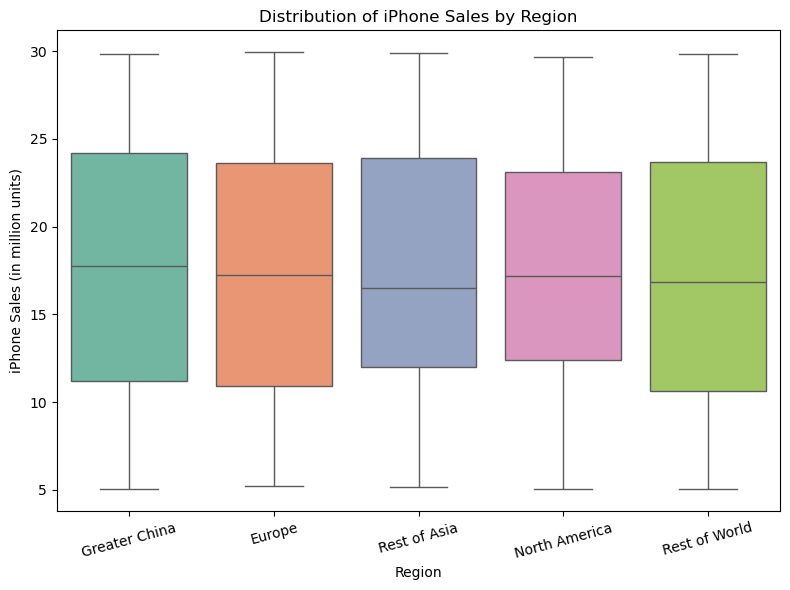

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data=apple_sales, x="Region", y="iPhone Sales (in million units)", palette="Set2")
plt.title("Distribution of iPhone Sales by Region")
plt.xlabel("Region")
plt.ylabel("iPhone Sales (in million units)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Step 8: Line Plot - Products Across 5 States

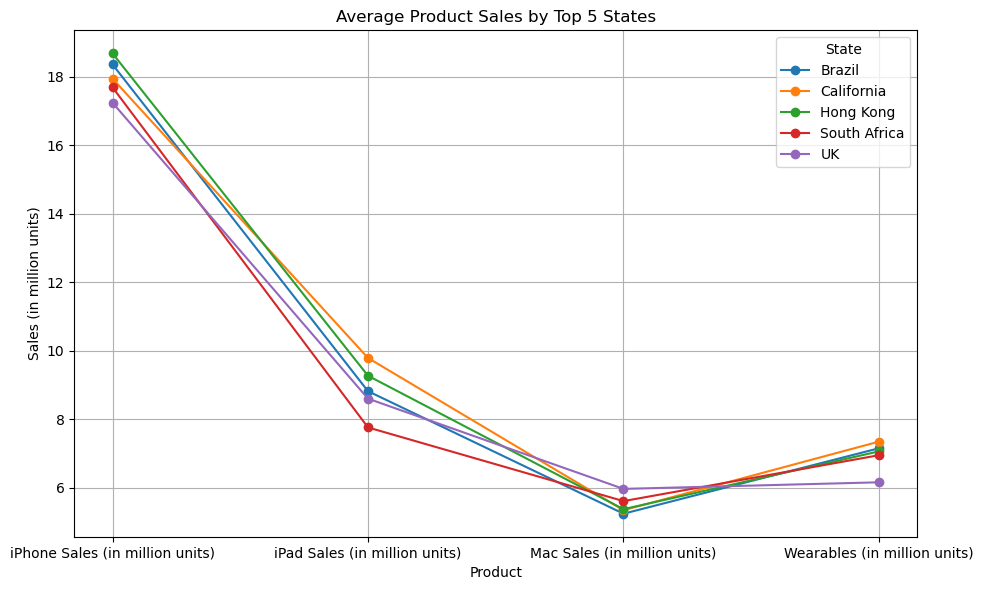

In [29]:
# Add a new column for total product sales (excluding services)
apple_sales["Total Product Sales"] = (
    apple_sales["iPhone Sales (in million units)"] + 
    apple_sales["iPad Sales (in million units)"] + 
    apple_sales["Mac Sales (in million units)"] + 
    apple_sales["Wearables (in million units)"]
)

# Get top 5 states by total product sales
top5_states = apple_sales.groupby("State")["Total Product Sales"].sum().sort_values(ascending=False).head(5).index
df_top5 = apple_sales[apple_sales["State"].isin(top5_states)]

# Group by State and calculate average product sales
state_avg = df_top5.groupby("State")[
    ["iPhone Sales (in million units)", 
     "iPad Sales (in million units)", 
     "Mac Sales (in million units)", 
     "Wearables (in million units)"]
].mean()

# Transpose for easier plotting
state_avg = state_avg.T

# Plot
plt.figure(figsize=(10,6))
for state in state_avg.columns:
    plt.plot(state_avg.index, state_avg[state], marker='o', label=state)

plt.title("Average Product Sales by Top 5 States")
plt.xlabel("Product")
plt.ylabel("Sales (in million units)")
plt.legend(title="State")
plt.grid(True)
plt.tight_layout()
plt.show()

# Overview/Conclusion
## The exploratory analysis showed that iPhones remain Apple’s strongest product by sales volume, with Services and Wearables also contributing significantly to revenue. Sales performance varies across regions and states, especially for Services revenue, revealing key markets where Apple could target its efforts. The variation in Services revenue among the top states suggests opportunities for tailored marketing or regional strategies. These insights provide a strong foundation for building a predictive model focused on understanding and forecasting Services revenue, helping Apple optimize its business strategy based on regional and product trends.

# Term Project: Milestone 2

## Step 1: Feature Information
### I standardized the sales data for iPhones, iPads, Macs, and Wearables so that all the numbers are on the same scale. This helps the model treat each feature equally and not let one product's sales overpower the others. I also encoded the State and Region categorical variables using one-hot encoding to include geographic information in the model.

In [32]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
numeric_cols = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                'Mac Sales (in million units)', 'Wearables (in million units)']

# Standardize the numeric columns
scaler = StandardScaler()
apple_sales[numeric_cols] = scaler.fit_transform(apple_sales[numeric_cols])

# Check the transformation
apple_sales.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $),Total Product Sales
0,Chongqing,Greater China,-1.391280,-0.486293,-1.742653,-0.357772,15.88,21.28
1,Germany,Europe,-1.228247,1.471327,0.588463,0.164226,10.12,37.14
2,UK,Europe,-1.649066,1.479361,1.287000,0.425225,19.85,36.67
3,Shanghai,Greater China,-1.341116,-0.159577,1.686164,-1.578028,6.16,27.85
4,Thailand,Rest of Asia,-0.103742,-0.116729,0.360940,-1.171276,13.29,34.77


## Step 2: Feature Engineering 
### I decided to use the individual standardized product sales as features for the model, instead of combining them into total sales or ratios. This helps the model capture the specific impact each product category has on services revenue, avoiding redundant information.

In [90]:
# Drop 'Total Product Sales' and 'iPhone Ratio' columns since they're redundant
apple_sales = apple_sales.drop(columns=['Total Product Sales', 'iPhone Ratio'], errors='ignore')

# Select all columns except the target 'Services Revenue (in billion $)' as features
features = [col for col in apple_sales.columns if col != 'Services Revenue (in billion $)']

X = apple_sales[features]
y = apple_sales['Services Revenue (in billion $)']

# Display feature columns to confirm
print("Features used for modeling:")
print(X.columns)

Features used for modeling:
Index(['iPhone Sales (in million units)', 'iPad Sales (in million units)',
       'Mac Sales (in million units)', 'Wearables (in million units)',
       'State_Beijing', 'State_Brazil', 'State_California', 'State_Canada',
       'State_Chongqing', 'State_Florida', 'State_France', 'State_Germany',
       'State_Hong Kong', 'State_Illinois', 'State_India', 'State_Indonesia',
       'State_Italy', 'State_Japan', 'State_Mexico', 'State_New York',
       'State_Shanghai', 'State_Shenzhen', 'State_South Africa',
       'State_South Korea', 'State_Spain', 'State_Texas', 'State_Thailand',
       'State_UK', 'Region_Greater China', 'Region_North America',
       'Region_Rest of Asia', 'Region_Rest of World'],
      dtype='object')


## Step 3: Handle Missing Data
### I checked for missing values in the dataset using isnull().sum(), but since there were no missing values, we didn't need to take further action. This step ensures our data is complete before building the model.

In [92]:
# Check for missing values in the dataset
missing_counts = apple_sales.isnull().sum()

# Print columns with missing data (if any)
print("Missing values per column:")
print(missing_counts[missing_counts > 0])

# If there are missing values, fill them with 0 (or you can choose another strategy)
apple_sales.fillna(0, inplace=True)

Missing values per column:
Series([], dtype: int64)


## Summary
### In this step, I prepared the data for modeling. I reviewed all columns and kept them since they all added value. The numeric sales data for iPhone, iPad, Mac, and Wearables were standardized to ensure consistent scaling. I also created two new features: total product sales and the iPhone sales ratio. After checking for missing values and finding none, I confirmed the dataset was clean. The categorical variables for State and Region had already been converted into dummy variables earlier, so the dataset is fully prepped and ready for modeling.

# Milestone 3:

## Step 1: Define Target and Features

In [69]:
# Target variable
y = apple_sales['Services Revenue (in billion $)']

# Feature set - drop target and other redundant columns
# Only keep the main product sales as features
X = apple_sales[['iPhone Sales (in million units)', 'iPad Sales (in million units)', 'Mac Sales (in million units)', 'Wearables (in million units)']]

## Step 2: Train/Test Split

In [71]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Step 3: Linear Regression Model

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 18.76
R-squared Score: -0.00


## Step 4: Feature Coefficients

In [75]:
# Step 4: Feature Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                           Feature  Coefficient
3     Wearables (in million units)     0.139714
2     Mac Sales (in million units)     0.076445
1    iPad Sales (in million units)     0.071703
0  iPhone Sales (in million units)    -0.061806


## Step 5: Model Justification

### I used a simple linear regression model to predict Services Revenue because it is straightforward and helps identify which product sales most influence services income. This approach assumes a roughly linear relationship, which fits the data here. Linear regression also provides clear coefficients to interpret the impact of each product category on services revenue. Although it can’t capture complex interactions, it’s a solid starting point for understanding these relationships.

## Step 6: Model Evaluation Summary

### The model shows that Wearables sales have the strongest positive influence on services revenue, followed by Mac and iPad sales. Surprisingly, iPhone sales showed a slight negative coefficient, which could indicate complex underlying factors. The model’s performance is limited (R-squared near zero), suggesting that linear regression may not fully capture the dynamics of services revenue. Still, this analysis provides initial insights into product contributions to Apple’s services business.